# Package Installation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Data Collection

In [2]:
#Load Diabeties Data Set
df=pd.read_csv('/content/diabetes-dataset.csv')

In [3]:
#Show First Five Row On The Diabeties Data Set

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
# Show The Shape 
df.shape

(2000, 9)

In [5]:
#Show the dataset info 
df.info

<bound method DataFrame.info of       Pregnancies  Glucose  ...  Age  Outcome
0               2      138  ...   47        1
1               0       84  ...   23        0
2               0      145  ...   31        1
3               0      135  ...   24        1
4               1      139  ...   21        0
...           ...      ...  ...  ...      ...
1995            2       75  ...   33        0
1996            8      179  ...   36        1
1997            6       85  ...   42        0
1998            0      129  ...   26        1
1999            2       81  ...   25        0

[2000 rows x 9 columns]>

In [6]:
#Show the dataset all information
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
# Show the outcome information 
df.Outcome.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

#Data Cleaning

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here No any NA values found for all colmns

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
print(df.isin({0}).sum())

Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64


In [11]:
Zero_value= ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [12]:
# for replace Zero to Mean Value 
for col in Zero_value:
  df[col] = df[col].replace({ 0 : df[col].mean() })


In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0000,138.0,62.0000,35.000,80.254,33.6,0.127,47,1
1,3.7035,84.0,82.0000,31.000,125.000,38.2,0.233,23,0
2,3.7035,145.0,69.1455,20.935,80.254,44.2,0.630,31,1
3,3.7035,135.0,68.0000,42.000,250.000,42.3,0.365,24,1
4,1.0000,139.0,62.0000,41.000,480.000,40.7,0.536,21,0


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.260877,121.970186,72.257047,26.932877,118.615412,32.643702,0.470930,33.090500,0.342000
std,2.924714,30.533180,11.968614,9.884003,88.366170,7.190337,0.323553,11.786423,0.474498
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,20.935000,80.254000,27.600000,0.244000,24.000000,0.000000
50%,3.703500,118.000000,72.000000,23.000000,80.254000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


#Visualizations


Text(0, 0.5, 'Pregnancies')

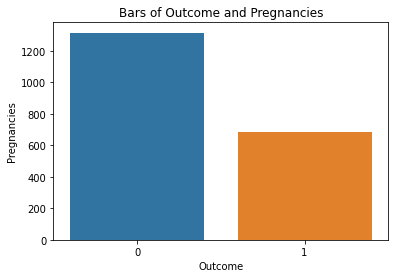

In [15]:
sns.countplot(x='Outcome',data=df)
plt.title("Bars of Outcome and Pregnancies")
plt.xlabel("Outcome")
plt.ylabel("Pregnancies")

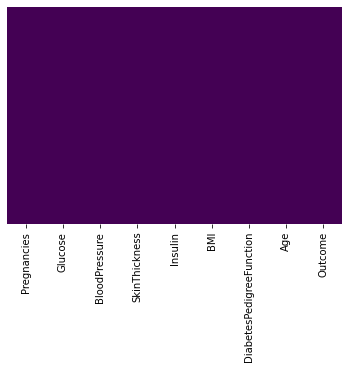

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

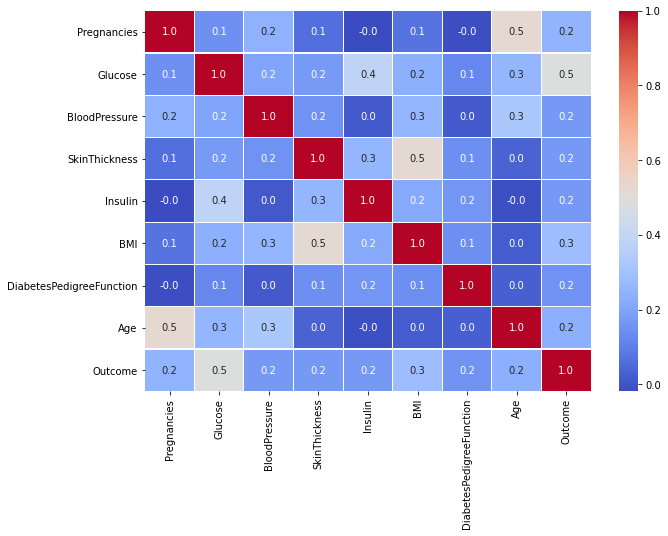

In [17]:
plt.figure(figsize=(10, 7))

sns.heatmap(df.corr(), annot=True, linewidths=0.2, fmt='.1f', cmap='coolwarm') # cmap='RdYlBu'
plt.show()

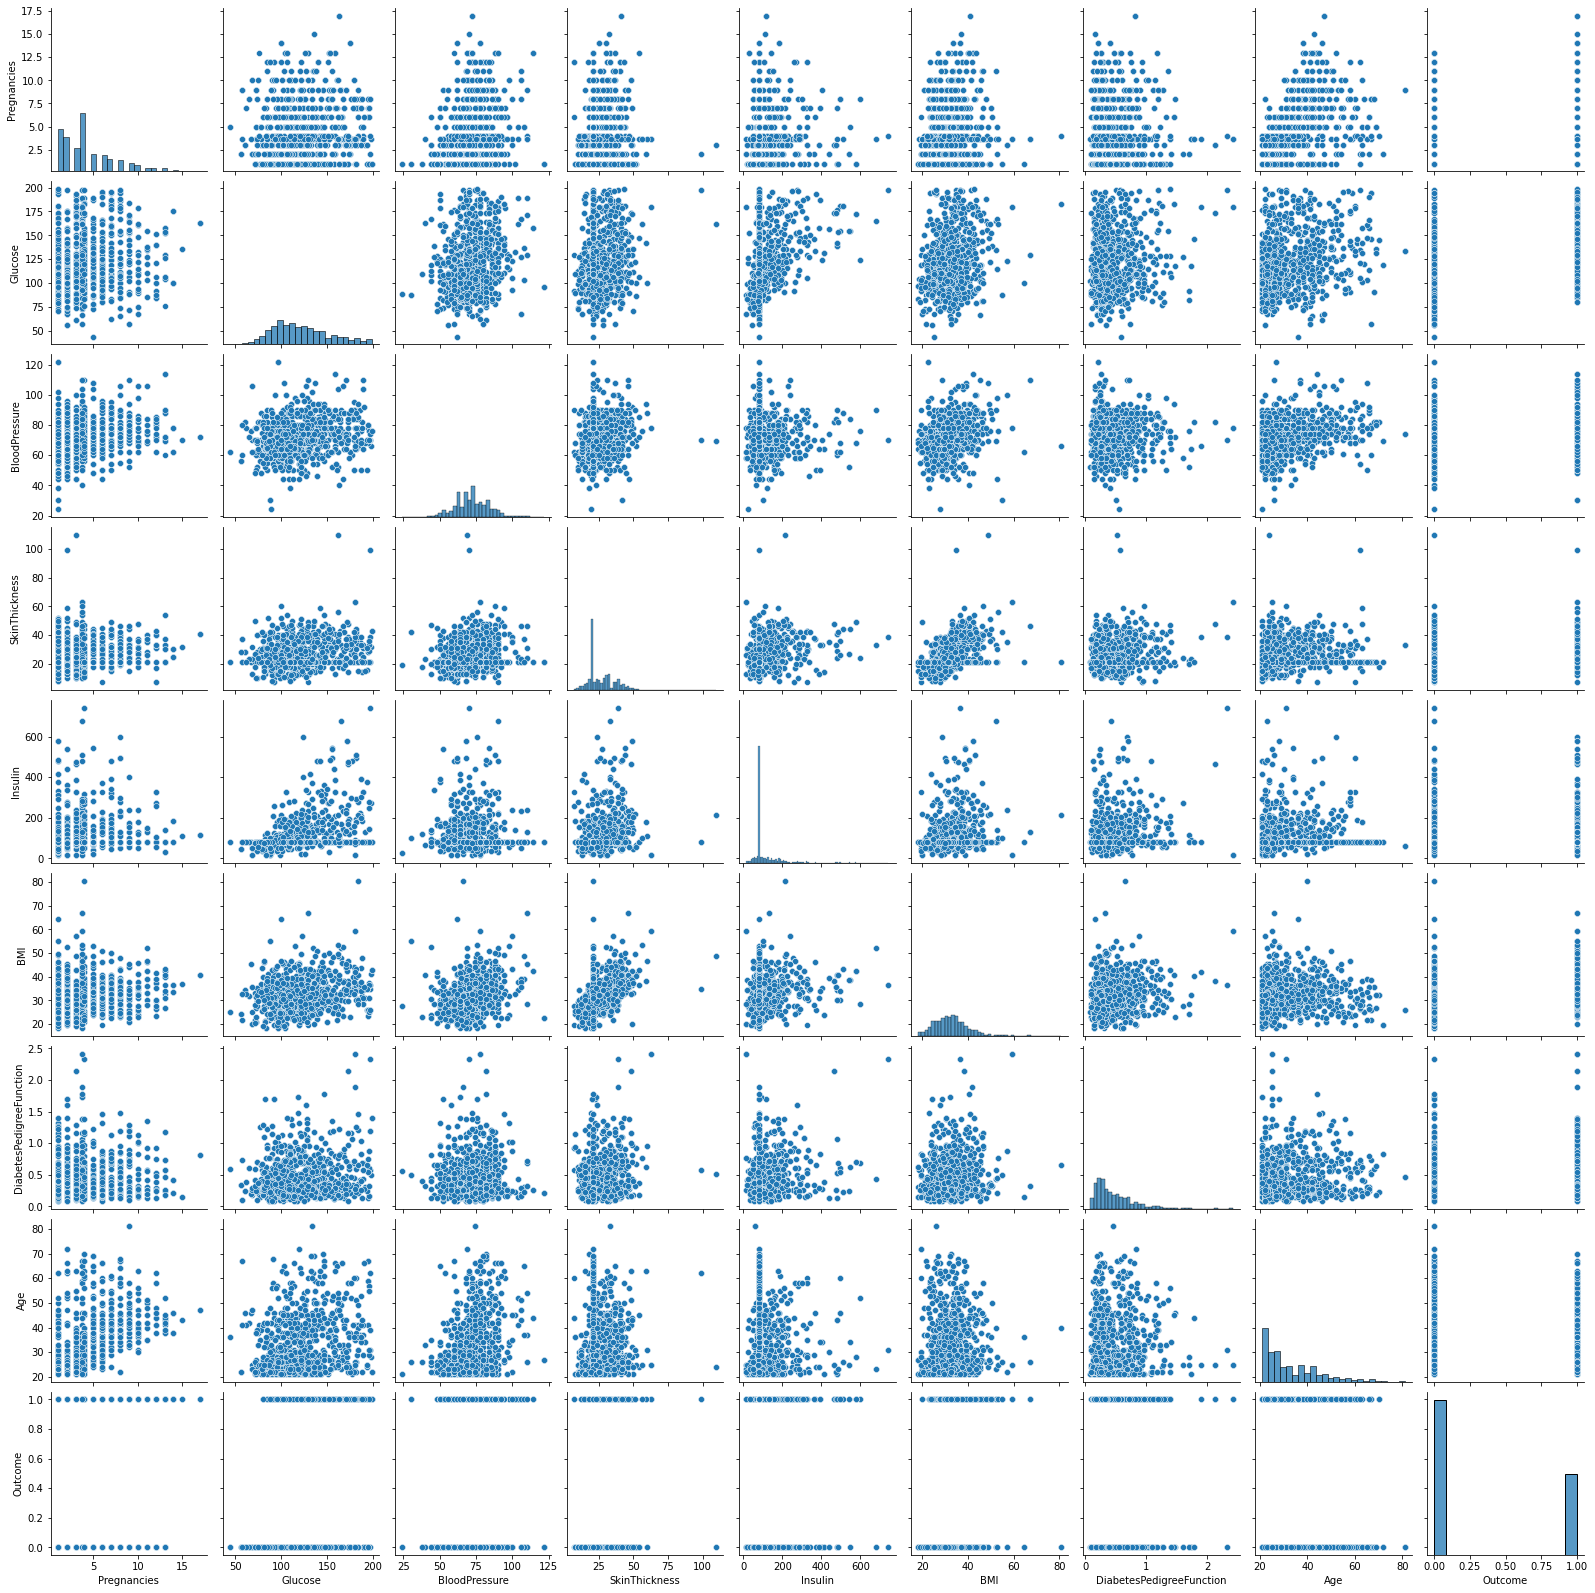

In [18]:
sns.pairplot(df)

#Feature Selection and *Data* Standardization

In [19]:
X = df.drop(columns = 'Outcome', axis=1)
Y= df['Outcome']

In [20]:
print(Y)

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64


In [21]:
print(X)

      Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0          2.0000    138.0        62.0000  ...  33.6                     0.127   47
1          3.7035     84.0        82.0000  ...  38.2                     0.233   23
2          3.7035    145.0        69.1455  ...  44.2                     0.630   31
3          3.7035    135.0        68.0000  ...  42.3                     0.365   24
4          1.0000    139.0        62.0000  ...  40.7                     0.536   21
...           ...      ...            ...  ...   ...                       ...  ...
1995       2.0000     75.0        64.0000  ...  29.7                     0.370   33
1996       8.0000    179.0        72.0000  ...  32.7                     0.719   36
1997       6.0000     85.0        78.0000  ...  31.2                     0.382   42
1998       3.7035    129.0       110.0000  ...  67.1                     0.319   26
1999       2.0000     81.0        72.0000  ...  30.1                     0.5

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
standardized_data = scaler.transform(X)

In [25]:
print(standardized_data)

[[-0.77321827  0.52512783 -0.85720977 ...  0.13303093 -1.06324616
   1.18042417]
 [-0.19062246 -1.2438823   0.81424543 ...  0.77293845 -0.7355513
  -0.85632626]
 [-0.19062246  0.75444396 -0.26004061 ...  1.60760043  0.49175869
  -0.17740945]
 ...
 [ 0.59477894 -1.21112285  0.47995439 ... -0.20083386 -0.27492362
   0.75610116]
 [-0.19062246  0.23029281  3.15428271 ...  4.793227   -0.46968566
  -0.60173245]
 [-0.77321827 -1.34216064 -0.02148217 ... -0.35385523  0.23516743
  -0.68659705]]


In [26]:
X=standardized_data
Y=df['Outcome']

In [46]:
#Train and Test data Splite 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,stratify =Y , random_state=21)

In [47]:
print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2000, 8) (1600, 8) (400, 8) (1600,) (400,)


#Loading SVM Model For Predictions



In [48]:
classifier = svm.SVC(kernel='linear')

In [49]:
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [51]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.775


In [52]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [53]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7925


##Loading Logistic Regression Model For Predictions



In [54]:
model_LR = LogisticRegression(random_state = 0, penalty = 'l2')
model_LR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
print("Training Score: ", model_LR.score(X_train, Y_train))
print("Testing Score:  ", model_LR.score(X_test, Y_test))

Training Score:  0.7775
Testing Score:   0.7975


In [56]:
predictions = model_LR.predict(X_test)

In [57]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       263
           1       0.75      0.61      0.67       137

    accuracy                           0.80       400
   macro avg       0.78      0.75      0.76       400
weighted avg       0.79      0.80      0.79       400

